In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteOBKECM/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteOBKECM/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteOBKECM/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test'],
train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [3]:
import tensorflow as tf
import numpy as np

batch_size = 1
timesteps = 20
features = 20
filters = 128
kernel_size = 5

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'filters: {filters}')
print(f'kernel_size: {kernel_size}')

random_input = np.random.rand(batch_size,timesteps,features)
print(f'shape of input array: {random_input.shape}')

conv1d = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')
result = conv1d(random_input)
print(f'shape of conv1d output: {result.shape}')

gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(f'shape of global max pooling output: {result.shape}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 20
filters: 128
kernel_size: 5
shape of input array: (1, 20, 20)
shape of conv1d output: (1, 16, 128)
shape of global max pooling output: (1, 128)


In [4]:
import tensorflow as tf

embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
__________________________________________________

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 40s 398ms/step - loss: 0.6116 - accuracy: 0.6701 - val_loss: 0.4084 - val_accuracy: 0.8178
Epoch 2/10
98/98 [==============================] - 39s 396ms/step - loss: 0.2917 - accuracy: 0.8799 - val_loss: 0.2698 - val_accuracy: 0.8901
Epoch 3/10
98/98 [==============================] - 39s 396ms/step - loss: 0.1565 - accuracy: 0.9459 - val_loss: 0.2647 - val_accuracy: 0.8926
Epoch 4/10
98/98 [==============================] - 39s 395ms/step - loss: 0.0747 - accuracy: 0.9803 - val_loss: 0.2826 - val_accuracy: 0.8932
Epoch 5/10
98/98 [==============================] - 38s 391ms/step - loss: 0.0272 - accuracy: 0.9969 - val_loss: 0.3185 - val_accuracy: 0.8902
Epoch 6/10
98/98 [==============================] - 39s 396ms/step - loss: 0.0094 - accuracy: 0.9997 - val_loss: 0.3469 - val_accuracy: 0.8915
Epoch 7/10
98/98 [==============================] - 39s 396ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3708 - val_accuracy: 0.8911

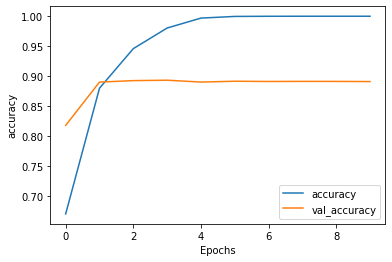

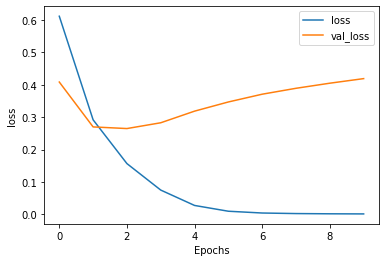

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")